# Cohort Analysis of Opinions on LGBT issues

For this project, we will be analyzing at data from the General Social Survey (GSS) to explore the opinions of different demographics on LGBT issues.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import utils
from utils import decorate

In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

In [3]:
# Read in the GSS variables.
gss = read_gss('gss_vars')

## Clean the Data

In [4]:
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,size,year
0,0,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,2,72,1972
1,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,72,1972
2,0,2,0,28,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,72,1972
3,0,9,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,72,1972
4,0,2,0,28,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,72,1972


In [29]:
gss.columns

Index(['ballot', 'fund', 'other', 'denom', 'relig', 'cappun', 'libhomo',
       'colhomo', 'spkhomo', 'natfare', 'attend', 'reliten', 'realrinc',
       'marhomo', 'homosex', 'hapmar', 'raclive', 'fund16', 'oth16', 'denom16',
       'relig16', 'nataid', 'natarms', 'natrace', 'res16', 'race', 'sex',
       'educ', 'age', 'divorce', 'marital', 'wrkstat', 'id_', 'reg16',
       'region', 'nateduc', 'natdrug', 'natcity', 'natheal', 'natenvir',
       'natspac', 'polviews', 'partyid', 'size', 'year'],
      dtype='object')

In [5]:
# Remove reponses of Not Applicable and No Answer
# In some cases also Don't Know answers 

gss['nataid'].replace([0,8,9], np.nan, inplace=True)
gss['natarms'].replace([0,8,9], np.nan, inplace=True)
gss['natrace'].replace([0,8,9], np.nan, inplace=True)
gss['res16'].replace([0,8,9], np.nan, inplace=True)
gss['educ'].replace([98,99], np.nan, inplace=True)
gss['age'].replace([89,98,99], np.nan, inplace=True)
gss['divorce'].replace([0,9,9], np.nan, inplace=True)
gss['marital'].replace([9], np.nan, inplace=True)
gss['wrkstat'].replace([9], np.nan, inplace=True)
gss['nateduc'].replace([0,8,9], np.nan, inplace=True)
gss['natdrug'].replace([0,8,9], np.nan, inplace=True)
gss['natcity'].replace([0,8,9], np.nan, inplace=True)
gss['natheal'].replace([0,8,9], np.nan, inplace=True)
gss['natenvir'].replace([0,8,9], np.nan, inplace=True)
gss['natspac'].replace([0,8,9], np.nan, inplace=True)
gss['polviews'].replace([0,8,9], np.nan, inplace=True)
gss['partyid'].replace([8,9], np.nan, inplace=True)

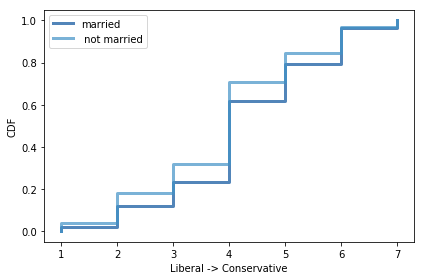

In [54]:
married = gss[gss['marital']==1]
not_married = gss[gss['marital'] > 1]

mar_cdf = thinkstats2.Cdf(married['polviews'])
not_mar_cdf = thinkstats2.Cdf(not_married['polviews'])
thinkplot.PrePlot(2)
thinkplot.cdf(mar_cdf, label = 'married')
thinkplot.cdf(not_mar_cdf, label = ' not married')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'CDF')

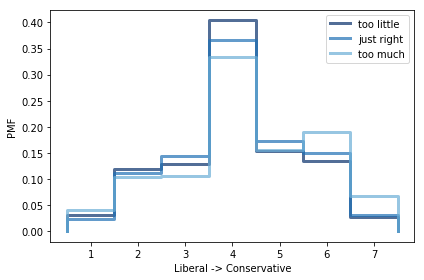

In [59]:
drug_little = gss[gss['natdrug']==1]
drug_right = gss[gss['natdrug'] == 2]
drug_lot = gss[gss['natdrug'] == 3]

drug_little_pmf = thinkstats2.Pmf(drug_little['polviews'])
drug_right_pmf= thinkstats2.Pmf(drug_right['polviews'])
drug_lot_pmf = thinkstats2.Pmf(drug_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(drug_little_pmf, label = 'too little')
thinkplot.pmf(drug_right_pmf, label = 'just right')
thinkplot.pmf(drug_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

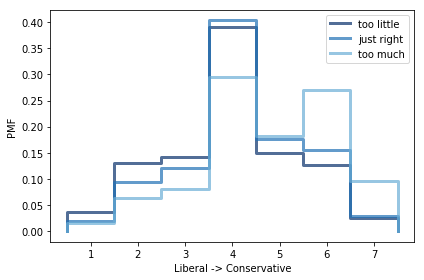

In [60]:
educ_little = gss[gss['nateduc']==1]
educ_right = gss[gss['nateduc'] == 2]
educ_lot = gss[gss['nateduc'] == 3]

educ_little_pmf = thinkstats2.Pmf(educ_little['polviews'])
educ_right_pmf= thinkstats2.Pmf(educ_right['polviews'])
educ_lot_pmf = thinkstats2.Pmf(educ_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(educ_little_pmf, label = 'too little')
thinkplot.pmf(educ_right_pmf, label = 'just right')
thinkplot.pmf(educ_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

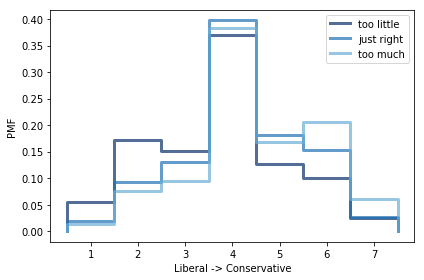

In [61]:
race_little = gss[gss['natrace']==1]
race_right = gss[gss['natrace'] == 2]
race_lot = gss[gss['natrace'] == 3]

race_little_pmf = thinkstats2.Pmf(race_little['polviews'])
race_right_pmf= thinkstats2.Pmf(race_right['polviews'])
race_lot_pmf = thinkstats2.Pmf(race_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(race_little_pmf, label = 'too little')
thinkplot.pmf(race_right_pmf, label = 'just right')
thinkplot.pmf(race_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

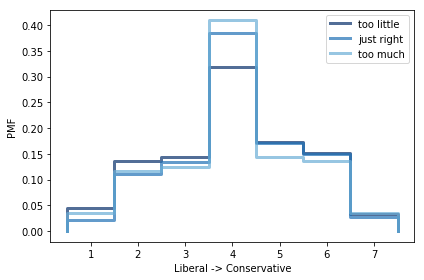

In [62]:
spac_little = gss[gss['natspac']==1]
spac_right = gss[gss['natspac'] == 2]
spac_lot = gss[gss['natspac'] == 3]

spac_little_pmf = thinkstats2.Pmf(spac_little['polviews'])
spac_right_pmf= thinkstats2.Pmf(spac_right['polviews'])
spac_lot_pmf = thinkstats2.Pmf(spac_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(spac_little_pmf, label = 'too little')
thinkplot.pmf(spac_right_pmf, label = 'just right')
thinkplot.pmf(spac_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')